In [2]:
from database import Batiment
from constants import DB_NAME
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime,date

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_log_error
from sklearn import decomposition
from sklearn import svm
from sklearn import metrics

In [48]:
batiment = Batiment(DB_NAME,93)
rows = (batiment._get_data_classification())
bat = pd.DataFrame(rows)
bat.columns = ['id','type','leger','status','date_cons','logements','etages','mat_mur','mat_toit','source']

In [49]:
bat.describe()

logements         etages
count  419080.000000  419080.000000
mean        4.825360       2.650926
std        12.030866       1.954676
min         1.000000       0.000000
25%         1.000000       2.000000
50%         1.000000       2.000000
75%         2.000000       3.000000
max      1147.000000      38.000000

In [50]:
bat.leger.value_counts()

Non    418931
Oui       149
Name: leger, dtype: int64

In [51]:
bat.status.value_counts()

En service         419063
En projet               9
En construction         5
En ruine                3
Name: status, dtype: int64

In [52]:
bat.mat_mur.value_counts()

40    78781
50    37597
30    36307
24    32840
00    30905
20    25745
90    23262
10    21336
34    18715
14    16309
45    15711
35     7120
12     6558
49     6019
13     5529
39     4637
23     3874
59     2991
46     2988
03     2955
09     2636
04     2636
05     2547
25     2337
60     2137
19     2076
15     1730
29     1661
56     1417
42     1298
69     1142
26     1056
01     1047
36     1014
43      851
02      671
16      655
54      623
41      542
32      255
06      224
53      182
52       92
94       84
21       78
95       72
31       55
96       45
51       40
93       36
65       28
64       28
91       22
92       17
63       14
61        6
62        4
Name: mat_mur, dtype: int64

In [53]:
bat.mat_toit.value_counts()

10    274961
00     30911
30     26996
40     15280
90     12248
01      8715
23      8304
20      7920
13      7822
19      4567
14      3259
49      2100
09      1488
12      1348
39       826
34       547
03       504
02       504
04       420
29       260
24       231
32       177
31        45
91        29
21        28
41        26
94        19
43        14
93         8
92         5
42         2
Name: mat_toit, dtype: int64

In [54]:
bat.source.value_counts()

Cadastre              404507
Imagerie aÃ©rienne     14520
Autre                     53
Name: source, dtype: int64

In [55]:
bat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419080 entries, 0 to 419079
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         419080 non-null  object
 1   type       419080 non-null  object
 2   leger      419080 non-null  object
 3   status     419080 non-null  object
 4   date_cons  405262 non-null  object
 5   logements  419080 non-null  int64 
 6   etages     419080 non-null  int64 
 7   mat_mur    409537 non-null  object
 8   mat_toit   409564 non-null  object
 9   source     419080 non-null  object
dtypes: int64(2), object(8)
memory usage: 32.0+ MB


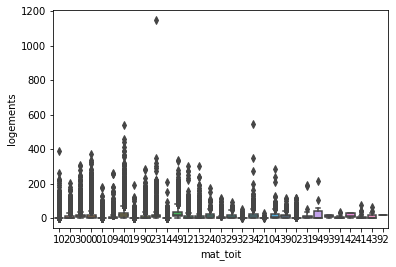

In [11]:
ax = sns.boxplot(x="mat_toit",y="logements",data = bat)


In [56]:
bat.head()

id              type leger      status   date_cons  \
0  BATIMENT0000000244309860  IndiffÃ©renciÃ©e   Non  En service  1926-01-01   
1  BATIMENT0000000244309884  IndiffÃ©renciÃ©e   Non  En service  1987-01-01   
2  BATIMENT0000000244310016  IndiffÃ©renciÃ©e   Non  En service  1957-01-01   
3  BATIMENT0000000244310029  IndiffÃ©renciÃ©e   Non  En service  1994-01-01   
4  BATIMENT0000000244310030  IndiffÃ©renciÃ©e   Non  En service  1934-01-01   

   logements  etages mat_mur mat_toit    source  
0          1       2      16       20  Cadastre  
1          2       1      90       10  Cadastre  
2          1       2      40       10  Cadastre  
3          1       1      03       10  Cadastre  
4          1       2      49       10  Cadastre

In [57]:
bat_train = bat[~bat.date_cons.isna()]

In [58]:
bat_train.isna().sum()

id              0
type            0
leger           0
status          0
date_cons       0
logements       0
etages          0
mat_mur      8450
mat_toit     8435
source          0
dtype: int64

In [59]:
bat_train = bat_train[~bat_train.mat_mur.isna()]
bat_train = bat_train[~bat_train.mat_toit.isna()]


In [60]:
bat_train.isna().sum()

id           0
type         0
leger        0
status       0
date_cons    0
logements    0
etages       0
mat_mur      0
mat_toit     0
source       0
dtype: int64

In [82]:
#bat_categorical = pd.get_dummies(bat_train[['leger','status','mat_mur','mat_toit','source']])
bat_categorical = pd.get_dummies(bat_train[['mat_mur']])

In [83]:
bat_categorical.head()

mat_mur_00  mat_mur_01  mat_mur_02  mat_mur_03  mat_mur_04  mat_mur_05  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           1           0           0   
4           0           0           0           0           0           0   

   mat_mur_06  mat_mur_09  mat_mur_10  mat_mur_12  ...  mat_mur_64  \
0           0           0           0           0  ...           0   
1           0           0           0           0  ...           0   
2           0           0           0           0  ...           0   
3           0           0           0           0  ...           0   
4           0           0           0           0  ...           0   

   mat_mur_65  mat_mur_69  mat_mur_90  mat_mur_91  mat_mur_92  mat_mur_93  \
0           0           0           0           0           0           0   
1           0           0           1           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   mat_mur_94  mat_mur_95  mat_mur_96  
0           0           0           0  
1           0           0           0  
2           0           0           0  
3           0           0           0  
4           0           0           0  

[5 rows x 57 columns]

In [63]:
#np_bat_ready = np.concatenate((bat_train[['logements','etages']].values,bat_categorical.values),axis=1)

In [64]:
np_bat_ready.shape

(396803, 99)

In [65]:
bat_train['delta_date'] = bat_train.date_cons.apply(lambda x: (x - date(1975,1,1)).days)
#for i in bat_train.date_cons:
#    delta = (i - date(1975,1,1)).days

In [66]:
bat_train['delta_date'] = bat_train.delta_date.apply(lambda x : 1 if x>0 else 0)
bat_train['delta_date'] 

0         0
1         1
2         0
3         1
4         0
         ..
419072    0
419073    0
419077    0
419078    0
419079    1
Name: delta_date, Length: 396803, dtype: int64

In [84]:
#X,Y = np_bat_ready[0:10000], bat_train['delta_date'][0:10000].values
X,Y = bat_categorical[0:10000].values, bat_train['delta_date'][0:10000].values


In [85]:
X_train, X_valide, Y_train, Y_valide = train_test_split(X,Y, test_size = 0.3) 

In [86]:
svm_bat = svm.SVC(kernel='linear',verbose = False)
svm_bat.fit(X_train,Y_train)

SVC(kernel='linear')

In [87]:
y_pred = svm_bat.predict(X_valide)

In [88]:
print('accuracy', metrics.accuracy_score(Y_valide,y_pred))

accuracy 0.7473333333333333
